<a href="https://colab.research.google.com/github/KelianF/MachineLearning/blob/master/Supervised/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Linear Regression
## Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Set up data and display it

Text(0, 0.5, 'y')

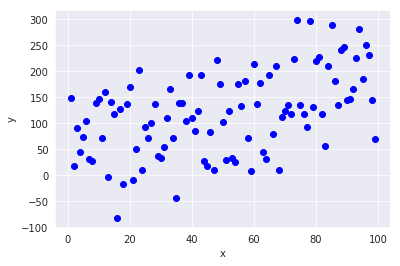

In [2]:
#Defining the x array. 
x=np.array(range(1,100)) 


#Defining the y array. 
y=10+2*x.ravel() 
y=y+np.random.normal(loc=0, scale=70, size=99)


plt.scatter(x,y, color='blue')
plt.xlabel('x') 
plt.ylabel('y')


# Using Scikit-Learn
## Imports


In [0]:
from sklearn.linear_model import LinearRegression

## Code

In [0]:
Reg = LinearRegression()
Reg.fit(x[:, np.newaxis],y[:,np.newaxis])
y_hat=Reg.predict(x[:, np.newaxis])


In [5]:
print('Intercept is: ' + str(round(Reg.intercept_[0],3)))
print('Coef is/are: ' + str(Reg.coef_))

print('R2 is: ' + str(round(Reg.score(x[:, np.newaxis],y[:, np.newaxis]),2))) 


Intercept is: 52.434
Coef is/are: [[1.36012833]]
R2 is: 0.24


## Graphical representation

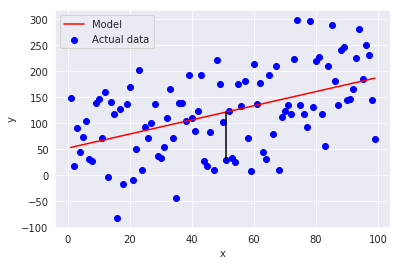

In [6]:
plt.scatter(x,y, color='blue', label ='Actual data') 
plt.plot(x,y_hat, color='red', label ='Model')
plt.plot((x[50],x[50]) ,(y[50], y_hat[50]), color='black')
plt.xlabel('x') 
plt.ylabel('y')
plt.legend()
plt.show()

This Graphical representation, shows the data and our model. 

I have added a line representing the difference between our model and the actual data, in econometrics, this is called ε. 

Hence, a regression is a minimisation problem of the sum of all the ε squared.


Furthermore, the regression performed here is of the form Y on X, which explais why the ε is parallel to the Y axis. If the opposite was computed, the ε looked at for minimization would've been parallel to the X axis.

# Using Scipy

## imports

In [0]:
from scipy import stats

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [9]:
print('Intercept is: ' + str(round(intercept,3)))
print('Coef is/are: ' + str(slope))

print('R2 is: ' + str(round(r_value**2,2))) 



Intercept is: 52.434
Coef is/are: 1.3601283317895354
R2 is: 0.24


# Using TensorFlow

## Import

In [0]:
import tensorflow as tf

## Code

In [11]:
# Defining the placeholder that we can input in the optimizer.

X = tf.placeholder("float") 
Y = tf.placeholder("float") 

# Declaring two trainable TF variables for the weight and bias (initialized randomly), and two parameters: The learning rate and the epochs.

W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

learning_rate = 0.01
training_epochs = 1000

# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * len(x)) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

W0721 01:05:43.239559 140073700886400 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 

        if (epoch + 1) % 50 == 0:  # Displaying the result after every 50 epochs 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 

    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})  # Storing necessary values to be used outside the Session 
    weight = sess.run(W) 
    bias = sess.run(b) 

# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, ",Weight =", weight, ",bias =", bias, '\n') 

Epoch 50 : cost = 5880.4136 W = 0.663797 b = 6.0494676
Epoch 100 : cost = 5681.5 W = 0.60375315 b = 11.993205
Epoch 150 : cost = 5507.104 W = 0.54797345 b = 17.514826
Epoch 200 : cost = 5354.0645 W = 0.49615604 b = 22.644209
Epoch 250 : cost = 5219.6333 W = 0.44801897 b = 27.40928
Epoch 300 : cost = 5101.428 W = 0.40330127 b = 31.835876
Epoch 350 : cost = 4997.3823 W = 0.36175936 b = 35.948086
Epoch 400 : cost = 4905.6997 W = 0.32316816 b = 39.768227
Epoch 450 : cost = 4824.822 W = 0.28731796 b = 43.317017
Epoch 500 : cost = 4753.391 W = 0.254014 b = 46.613777
Epoch 550 : cost = 4690.2324 W = 0.22307597 b = 49.676323
Epoch 600 : cost = 4634.319 W = 0.19433546 b = 52.521336
Epoch 650 : cost = 4584.755 W = 0.1676354 b = 55.16436
Epoch 700 : cost = 4540.768 W = 0.14283308 b = 57.61954
Epoch 750 : cost = 4501.678 W = 0.119792044 b = 59.900368
Epoch 800 : cost = 4466.8945 W = 0.09838665 b = 62.019264
Epoch 850 : cost = 4435.9023 W = 0.07850267 b = 63.98758
Epoch 900 : cost = 4408.2515 W = 0

In this case, the method to solve the linear regression minimization problem is to perform a gradiant descent, the reason it has not been performed that way in the previous two cases is that linear regression has a closed formula (More explanation below), which is quite rare in optimization problem.

Hence, the TensorFlow solution is more general for optimization problems.

## Graphical representation

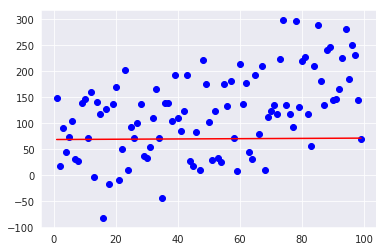

In [13]:
plt.plot(x, y, 'ro', color='blue') 
plt.plot(x, predictions, color='red')

# Linear Regression from scratch and explanation

The OLS Equation looks as follow:
\begin{equation}
y = X\hat{β} + ϵ\end{equation}

In this equation:
β is the vector of weight of the X independent variables, ϵ represent the error vector.

Hence, the Sum of Squred Residual, can be written as follow:
\begin{equation}
e = y − X\hat{β}\end{equation}


Which gives us:
\begin{equation}
e'e = (y − X\hat{β})'(y − X\hat{β})\end{equation}
       \begin{equation}
    = y'y - \hat{β}'X'y - y'X\hat{β} + β'X'Xβ\end{equation}
    \begin{equation}
    = y'y - 2\hat{β}'X'y + \hat{β}'X'X\hat{β}\end{equation}
    

Using the differential method to find the minimum:

\begin{equation}
\frac{∂e'e}{\hat{β}} = 2X'y + 2X'X\hat{β} = 0
\end{equation}
   
To check if it is indeed a minimum, it is possible to take the second derivative with respect to β, which would give us: 2X'X. Hence, so long as X has full rank, this is a positive definite matrix, and thus a minimum.
\begin{equation}
(X'X)\hat{β} = X'y
\end{equation}\begin{equation}
(X'X)^{-1}(X'X)\hat{β} = (X'X)^{-1}X'y
\end{equation}
By definition: \begin{equation} (X'X)^{-1}(X'X) = I \end{equation}

Giving us:
\begin{equation}
I \hat{β}  = (X'X)^{-1}X'y
\end{equation} 
\begin{equation}
\hat{β}  = (X'X)^{-1}X'y \end{equation}


       
       
       
       

In [14]:
# Let's first define X using the previous x and adding a first column of ones:

X = np.hstack((np.ones((len(x),1)) ,x[:, np.newaxis]))

# Now we can simply use the previously derived formula:
Intercept, Slope = np.linalg.inv(X.T @ X) @ (X.T @ y)

print('Intercept is: ' + str(round(Intercept,3)))
print('Coef is: ' + str(Slope))

Intercept is: 52.434
Coef is: 1.3601283317895376


This, Should, gives us the same values as previously obtained with Sklearn, Scipy and TensorFlow.
However, it should be noted that complexity is an important parameter in any algorithm, in this case, computing the inverse of X'.X is about O(n2.4) to O(n3) depending on the implementation.

Hence, it can be interesting to use a training model to find the solution instead of a closed formula. Which introduces the next step: Gradient Descent


# Gradient Descent

In [0]:
alpha = 0.0001  # Which will be the learning rate
NbrIter = 1000000  # Representing the number of iteration
m = len(y)
theta = np.random.randn(2,1)
Y = y.reshape(-1,1)

for iter in range(NbrIter):

    theta = theta - (1/m) * alpha * ( X.T @ ((X @ theta) - Y) )

In [34]:
print('Intercept is: ' + str(round(theta[0][0],3)))
print('Coef is: ' + str(theta[1][0]))

Intercept is: 52.434
Coef is: 1.3601283318052428
